The longitude and latitude of the Chesham is (51.7052, -0.611)
The longitude and latitude of the Upminster is (51.559, 0.251)


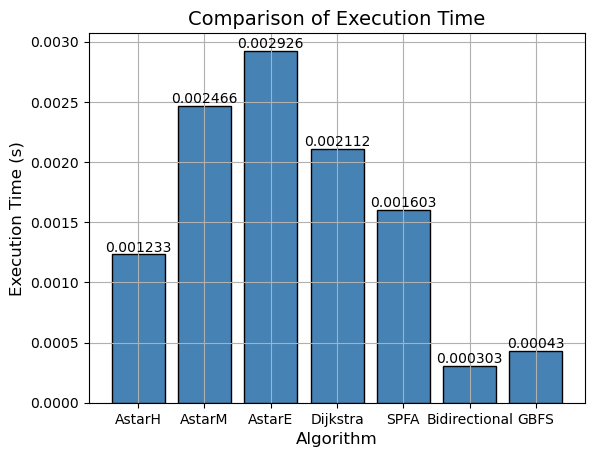

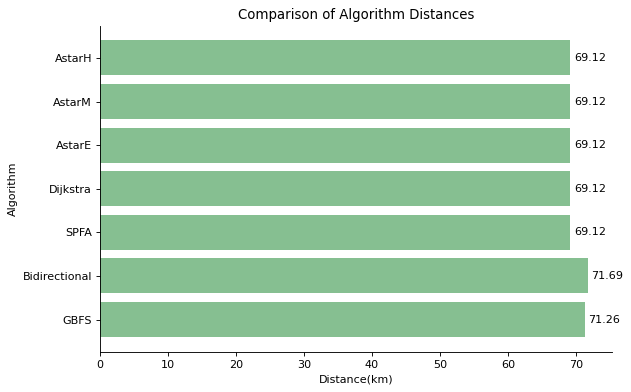

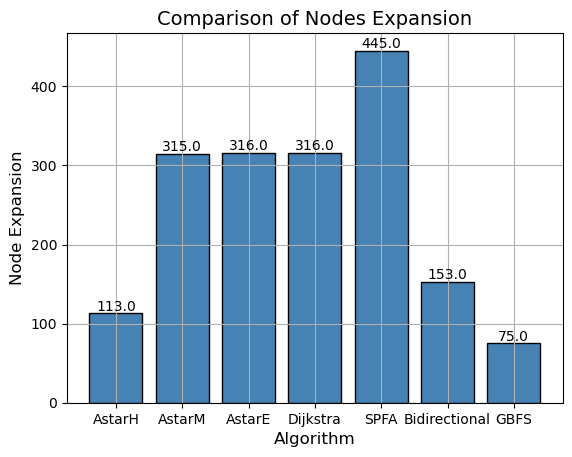

In [3]:
from typing import List
from plot_underground_path import plot_path
from build_data import Station, build_data
import argparse
from queue import PriorityQueue
import math
from collections import deque
import matplotlib.pyplot as plt
import time


# Implement the following function
def Astar(start_station_name: str, end_station_name: str, map: dict[str, Station],heuristic) :
    """
    runs astar on the map, find the shortest path between a and b
    Args:
        start_station_name(str): The name of the starting station
        end_station_name(str): str The name of the ending station
        map(dict[str, Station]): Mapping between station names and station objects of the name,
                                 Please refer to the relevant comments in the build_data.py
                                 for the description of the Station class
    Returns:
        List[Station]: A path composed of a series of station_name
    """
    # You can obtain the Station objects of the starting and ending station through the following codebuilds the 'map' by reading the data files
 
       # station(dict[str, Station]): A mapping between station names and station objects of the name
       # the Station class contains four attributes: id, name, position, and links.
      # Position is a binary combination of longitude and latitude
      # and links are a list of stations adjacent to the Station object
    if start_station_name not in map:
        raise TypeError(start_station_name + ' not found in graph!')
    if end_station_name not in map:
        raise TypeError(end_station_name + ' not found in graph!')
        
    start_station = map[start_station_name]
    end_station = map[end_station_name]

    # Given a Station object, you can obtain the name and latitude and longitude of that Station by the following code

    if start_station_name not in map:
        raise TypeError(start_station_name + ' not found in graph!')
    if end_station_name not in map:
        raise TypeError(end_station_name + ' not found in graph!')
        
    start_station = map[start_station_name]
    end_station = map[end_station_name]

    path=[]
    num=1
    queue = PriorityQueue()
    queue.put([heuristic(start_station,end_station),start_station.name])
    costs = {start_station.name: 0}  # record the distance to current node 
    previous = {}  # record previous node

    while not queue.empty():
        current_cost, current_name = queue.get()

        if current_name == end_station_name:
            path = []
            distance=current_cost
            while current_name:
                path.append(current_name)
                current_name = previous.get(current_name)
            path.reverse()
            
            return path,distance,num
        else:
            current=map[current_name]
            for neighbour in current.links:
                new_cost=current_cost+Haversine_dis(current,neighbour)-heuristic(current,end_station)+heuristic(neighbour,end_station)
                
            
                if neighbour.name not in costs or new_cost < costs[neighbour.name]:
                    costs[neighbour.name] = new_cost
                    previous[neighbour.name] = current.name
                    queue.put([new_cost, neighbour.name])
                    num+=1

    return None
    

def dijkstra(start_station_name: str, end_station_name: str, map: dict[str, Station]):
    if start_station_name not in map:
        raise TypeError(start_station_name + ' not found in graph!')
    if end_station_name not in map:
        raise TypeError(end_station_name + ' not found in graph!')
        
    start_station = map[start_station_name]
    path=[]
    num=1
    queue = PriorityQueue()
    queue.put([0,start_station.name])
    costs = {start_station.name: 0}  
    previous = {}  

    while not queue.empty():
        current_cost, current_name = queue.get()

        if current_name == end_station_name:
            distance=current_cost
            while current_name:
                path.append(current_name)
                current_name = previous.get(current_name)
            path.reverse()
            return path,distance,num
        else:
            current=map[current_name]
            for neighbour in current.links:
                new_cost = current_cost + Haversine_dis(neighbour,current)
                if neighbour.name not in costs or new_cost < costs[neighbour.name]:
                    costs[neighbour.name] = new_cost
                    previous[neighbour.name] = current.name
                    queue.put([new_cost, neighbour.name])
                    num+=1

    return None

def Greedy_best_first_search(start_station_name: str, end_station_name: str, map: dict[str, Station]):
    if start_station_name not in map:
        raise TypeError(start_station_name + ' not found in graph!')
    if end_station_name not in map:
        raise TypeError(end_station_name + ' not found in graph!')

    start_station = map[start_station_name]
    end_station = map[end_station_name]

    num = 1
    q = PriorityQueue()
    q.put((0, start_station))

    previous = {start_station: None}
    costs = {start_station: 0}

    while not q.empty():
        _, current = q.get()


        if current == end_station:
            path = []
            distance = costs[current]
            while current:
                path.append(current.name)
                current = previous[current]
            path.reverse()
            return path, distance, num

        for neighbour in current.links:
            if neighbour not in previous:
                previous[neighbour] = current
                edge_cost = Haversine_dis(current, neighbour)
                costs[neighbour] = costs[current] + edge_cost
                cost = Haversine_dis(neighbour, end_station)
                num+=1
                q.put((cost, neighbour))

    return None


def SPFA(start_station_name: str, end_station_name: str, map: dict[str, Station]):
    if start_station_name not in map:
        raise TypeError(start_station_name + ' not found in graph!')
    if end_station_name not in map:
        raise TypeError(end_station_name + ' not found in graph!')
        
    start_station = map[start_station_name]
    path=[]
    costs = {start_station.name: 0}  
    previous = {}  
    num=1
    queue = deque()
    queue.append(start_station.name)

    while queue:
        current_name = queue.popleft()
        current=map[current_name]
      
        for neighbour in current.links:
            new_cost = costs[current_name] + Haversine_dis(neighbour,current)
        
            if neighbour.name not in costs or new_cost < costs[neighbour.name]:
                costs[neighbour.name] = new_cost
                queue.append(neighbour.name)
                num+=1
                previous[neighbour.name]=current_name

    current_name = end_station_name
    distance=costs[end_station_name]
    while current_name:
        path.append(current_name)
        current_name = previous.get(current_name)
    path.reverse()
    return path,distance,num
 


def Bidirectional_search(start_station_name: str, end_station_name: str, map: dict[str, Station]):
    if start_station_name not in map:
        raise TypeError(start_station_name + ' not found in graph!')
    if end_station_name not in map:
        raise TypeError(end_station_name + ' not found in graph!')
          
    start_queue = deque([start_station_name])
    end_queue = deque([end_station_name])
    start_visited = set()
    start_visited.add(start_station_name)
    end_visited = set()
    end_visited.add(end_station_name)
    scost={start_station_name:0}
    ecost={end_station_name:0}
    path=[]
    s_pre={}
    e_pre={}
    
    while start_queue and end_queue:
        # from start
        start_name = start_queue.popleft()
        start_cost=scost[start_name]
        start=map[start_name]
        for neighbour in start.links:
    
            if neighbour.name not in start_visited:
                if neighbour.name in end_visited:
                    current_name=start_name
                    while current_name:
                        path.append(current_name)
                        current_name = s_pre.get(current_name)
                    path.reverse()
                    current_name2=neighbour.name
                    while current_name2:
                        path.append(current_name2)
                        current_name2=e_pre.get(current_name2)
                    return path,start_cost + Haversine_dis(start,neighbour) + ecost[neighbour.name], len(start_visited) + len(end_visited) 
                start_visited.add(neighbour.name)
                s_pre[neighbour.name]=start_name
                scost[neighbour.name]=start_cost + Haversine_dis(start,neighbour)
                start_queue.append(neighbour.name)
                
        # from end
        end_name= end_queue.popleft()
        end_cost =ecost[end_name]
        end=map[end_name]
        for neighbour in end.links:
            if neighbour.name not in end_visited:
                if neighbour.name in start_visited:
                    current_name=neighbour.name
                    while current_name:
                        path.append(current_name)
                        current_name = s_pre.get(current_name)
                    path.reverse()
                    current_name2=end_name
                    while current_name2:
                        path.append(current_name2)
                        current_name2=e_pre.get(current_name2)
                    return  path, end_cost + Haversine_dis(end,neighbour) + scost[neighbour.name],len(start_visited) + len(end_visited)  
                end_visited.add(neighbour.name)
                e_pre[neighbour.name]=end_name
                ecost[neighbour.name]=end_cost + Haversine_dis(end,neighbour)
                end_queue.append(neighbour.name)
              
    return None



    

def Haversine_dis(station1: Station, station2: Station):
    lat1, lon1 = station1.position[0], station1.position[1]
    lat2, lon2 = station2.position[0], station2.position[1]
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)
    a = math.sin((lat2_rad - lat1_rad)/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin((lon2_rad - lon1_rad)/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = 6371 * c 

    return distance

def Euclidean_dis(station1: Station, station2: Station):
    lat1, lon1 = station1.position[0], station1.position[1]
    lat2, lon2 = station2.position[0], station2.position[1]
    distance = math.sqrt((lat2 - lat1)**2 + (lon2 - lon1)**2)

    return distance

def Manhattan_dis(station1: Station, station2: Station):
    lat1, lon1 = station1.position[0], station1.position[1]
    lat2, lon2 = station2.position[0], station2.position[1]
    distance = abs(lat2 - lat1) + abs(lon2 - lon1)

    return distance


if __name__ == '__main__':

    # 创建ArgumentParser对象
    #parser = argparse.ArgumentParser()
    # 添加命令行参数
    #parser.add_argument('start_station_name', type=str, help='start_station_name')
    #parser.add_argument('end_station_name', type=str, help='end_station_name')
    #args = parser.parse_args()

    start_station_name ="Chesham"
    end_station_name = "Upminster"
    
    # The relevant descriptions of stations and underground_lines can be found in the build_data.py
    stations, underground_lines = build_data()

    start_station = stations[start_station_name]
    end_station = stations[end_station_name]

    print(f'The longitude and latitude of the {start_station.name} is {start_station.position}')
    print(f'The longitude and latitude of the {end_station.name} is {end_station.position}')
   
    algorithms= ["AstarH","AstarM","AstarE","Dijkstra", "SPFA","Bidirectional","GBFS"]
    paths=[]
    t=[0,0,0,0,0,0,0]
    d=[0,0,0,0,0,0,0]
    n=[0,0,0,0,0,0,0]
    iterations=1000
    for i in range(iterations):
        for algorithm in algorithms:
            start_time = time.perf_counter()
            if algorithm == "AstarH":
                path,distance,num=Astar(start_station_name, end_station_name, stations,Haversine_dis)
                if(i==iterations-1):
                    paths.append(path)
                d[0]+=distance
                n[0]+=num
                end_time = time.perf_counter()
                t[0]+=end_time - start_time
     
            elif algorithm == "AstarM":        
                path,distance,num=Astar(start_station_name, end_station_name, stations,Manhattan_dis)
                if(i==iterations-1):
                    paths.append(path)
                d[1]+=distance
                n[1]+=num
                end_time = time.perf_counter()
                t[1]+=end_time - start_time
            elif algorithm == "AstarE":       
                path,distance,num=Astar(start_station_name, end_station_name, stations,Euclidean_dis)
                if(i==iterations-1):
                    paths.append(path)
                d[2]+=distance
                n[2]+=num
                end_time = time.perf_counter()
                t[2]+=end_time - start_time
            elif algorithm == "Dijkstra":
                path,distance,num=dijkstra(start_station_name, end_station_name, stations)
                if(i==iterations-1):
                    paths.append(path)
                d[3]+=distance
                n[3]+=num
                end_time = time.perf_counter()
                t[3]+=end_time - start_time
            elif algorithm == "SPFA":
                path,distance,num=SPFA(start_station_name, end_station_name, stations)
                if(i==iterations-1):
                    paths.append(path)
                d[4]+=distance
                n[4]+=num
                end_time = time.perf_counter()
                t[4]+=end_time - start_time
            elif algorithm=="GBFS":
                path,distance,num=Greedy_best_first_search(start_station_name, end_station_name, stations)
                if(i==iterations-1):
                    paths.append(path)
                d[6]+=distance
                n[6]+=num
                end_time = time.perf_counter()
                t[6]+=end_time - start_time
            else :
                path,distance,num=Bidirectional_search(start_station_name, end_station_name, stations)
                if(i==iterations-1):
                    paths.append(path)
                d[5]+=distance
                n[5]+=num
                end_time = time.perf_counter()
                t[5]+=end_time - start_time
            
    t=[num / iterations for num in t]
    d=[round(num / iterations, 2) for num in d] 
    n=[num / iterations for num in n]      
        
    
    plt.bar(algorithms, t, color='steelblue', edgecolor='black')
    plt.xlabel("Algorithm", fontsize=12)
    plt.ylabel("Execution Time (s)", fontsize=12)
    plt.title("Comparison of Execution Time", fontsize=14)
    for i, v in enumerate(t):
        plt.text(i, v, str(round(v,6)), ha='center', va='bottom')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)
    plt.show()

    fig, ax = plt.subplots(figsize=(8, 5), dpi=80)
    ax.barh(algorithms, d, color='#86bf91')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("Distance(km)")
    ax.set_ylabel("Algorithm")
    ax.set_title("Comparison of Algorithm Distances")
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    for i, distance in enumerate(d):
        ax.text(distance + 0.5, i, str(distance), va='center', fontsize=10)
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()

    plt.bar(algorithms, n, color='steelblue', edgecolor='black')
    plt.xlabel("Algorithm", fontsize=12)
    plt.ylabel("Node Expansion", fontsize=12)
    plt.title("Comparison of Nodes Expansion", fontsize=14)
    for i, v in enumerate(n):
        plt.text(i, v, str(round(v,6)), ha='center', va='bottom')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)
    plt.show()
  
    

    # visualization the path
    # Open the visualization_underground/my_path_in_London_railway.html to view the path, and your path is marked in red
    for path in paths:
        plot_path(path, 'visualization_underground/my_shortest_path_in_London_railway.html', stations, underground_lines)

